In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats

In [2]:
df = pd.read_csv('bicicletas-compartidas.csv')

In [3]:
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

### Frecuencias para variables categoricas (tablas de frecuencia)


In [4]:
y_categorica = df['cuartil-ano']
y_categorica = y_categorica.apply(lambda x: 'Cat-' + str(int(x)))
y_categorica.head()

0    Cat-3
1    Cat-3
2    Cat-3
3    Cat-3
4    Cat-3
Name: cuartil-ano, dtype: object

In [5]:
valores, conteo_freq = np.unique(y_categorica, return_counts=True  )
valores, conteo_freq

(array(['Cat-0', 'Cat-1', 'Cat-2', 'Cat-3'], dtype=object),
 array([4394, 4387, 4303, 4330]))

In [6]:
# np.unique
# Returns the sorted unique elements of an array. 
# There are three optional outputs in addition to the unique elements:
# the indices of the input array that give the unique values
# the indices of the unique array that reconstruct the input array
# the number of times each unique value comes up in the input array

In [7]:
tabla_frecuencias = dict((zip(valores, conteo_freq)))
tabla_frecuencias

{'Cat-0': 4394, 'Cat-1': 4387, 'Cat-2': 4303, 'Cat-3': 4330}

### Frecuencias para variables numerica


In [8]:
y_numerica = df['viento'].copy()
np.min(y_numerica), np.max(y_numerica)

(0.0, 56.5)

### Definiciendo percentiles

Un **percentil** es una medida estadística utilizada para comparar datos. Consiste en un número de 0 a 100 que indica el porcentaje de datos que son igual o menor que un determinado valor.

In [9]:
np.percentile(y_numerica, q=100)

56.5

In [10]:
np.percentile(y_numerica, q=0)

0.0

In [11]:
np.percentile(y_numerica, q=50) # indica la media

15.0

In [12]:
np.median(y_numerica) 

15.0

### Definiciendo Cuartiles 

Cuando estamos parados en valores muy puntuales qu acumulancierta probabilidad

**Cuartiles** son los valores utilizados para dividir un conjunto de números en cuatro grupos iguales. Pon los números en orden y divídelos por la mitad con una mediana. A la izquierda de la mediana, los números se separan de nuevo, y a la derecha de la mediana, haz una tercera separación. En este punto, los datos se dividen en cuatro grupos y los tres marcadores son los cuartiles reales. Observa que hay cuatro grupos, pero esto se hace con tres cuartiles, que están numerados de izquierda a derecha como Cuartil-1, Cuartil-2 y Cuartil-3


In [13]:
# Cuartiles
valores = [0,25,50,75,100] # parten en 4 la valriable y
np.percentile(y_numerica, q = valores)

array([ 0. , 10. , 15. , 20.5, 56.5])

In [14]:
# Quintilles
valores = [0,20,40,60,80,100] # parten en 5 la valriable y
np.percentile(y_numerica, q = valores)

array([ 0. ,  9. , 13. , 17. , 22. , 56.5])

In [15]:
# Deciles
valores = list(range(0, 110,10))
np.percentile(y_numerica, q = valores)

array([ 0. ,  6.5,  9. , 11. , 13. , 15. , 17. , 19.5, 22. , 27. , 56.5])

In [16]:
y =df['bicis-compartidas']
y.describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: bicis-compartidas, dtype: float64

### Valores atipicos

Outlier o valor atipico: todo valor que este por fuera del rango,sera considerado un outlier y es una **alerta** de que puede pertenecer a una distribucion diferente, quedebe ser tratada de una forma distinta.

In [17]:
#outlier
Q1 = np.percentile(y_numerica, q = 25)
Q3 = np.percentile(y_numerica, q = 75)

# Rango inter-quartilico
RI = Q3 - Q1

lim_inferior = Q1 - 1.5 * RI 
lim_superior = Q3 + 1.5 * RI 
[lim_inferior, lim_superior]

[-5.75, 36.25]

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([8.274e+03, 4.416e+03, 2.355e+03, 1.241e+03, 5.610e+02, 4.710e+02,
        8.800e+01, 2.000e+00, 3.000e+00, 3.000e+00]),
 array([   0.,  786., 1572., 2358., 3144., 3930., 4716., 5502., 6288.,
        7074., 7860.]),
 <a list of 10 Patch objects>)

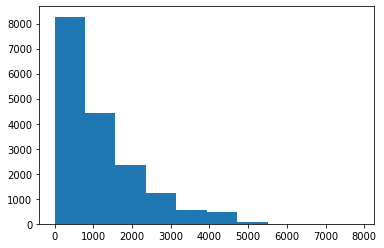

In [19]:
plt.hist(y)